<div style="line-height:0.45">
<h1 style="color:#26BBEE  "> Linear Regression 2 </h1>
</div>
<div style="line-height:0.5">
<h4> Linear Regression from scratch + Feature selection + (Multiple) Linear Regression with seaborn and sklearn.
</h4>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> formulas markdown + statsmodel + sqft_living + sns pairplot + scipy implementation
</span>
</div>

In [153]:
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels import tools
import statsmodels.api as sml

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [26]:
dataset_house = pd.read_csv('../datas/kc_house_data.csv')
dataset_house.tail()

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608      1530.0              0      2009             0    98103  47.6993   
21609      2310.0              0      2014             0    98146  47.5107   
21610      1020.0              0      2009             0    98144  47.5944   
21611      1600.0              0      2004             0    98027  47.5345   
21612      1020.0              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

In [27]:
X = dataset_house.drop(['price', 'id', 'date'],  axis=1)
y = dataset_house[['price']]

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21611 non-null  float64
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [29]:
features = X.columns
features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
X.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21611.000000   
mean       0.007542      0.234303      3.409430      7.656873   1788.396095   
std        0.086517      0.766318      0.650743      1.175459    828.128162   
min        0.000000      0.000000      1.000000      1.000000    290.000000   
25%        0.000000      0.000000      3.000000      7.000000   1190.000000   
50%        0.000000      0.000000      3.000000      7.000000   1560.000000   
75%        0.000000      0.000000      4.000000      8.000000   2210.000000   
max        1.000000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean      291.509045   1971.005136     84.402258  98077.939805     47.560053   
std       442.575043     29.373411    401.679240     53.505026      0.138564   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.471000   
50%         0.000000   1975.000000      0.000000  98065.000000     47.571800   
75%       560.000000   1997.000000      0.000000  98118.000000     47.678000   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21613.000000   21613.000000   21613.000000  
mean    -122.213896    1986.552492   12768.455652  
std        0.140828     685.391304   27304.179631  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

<div style="line-height:0.45">
<h2 style="color:#26BBEE  "> <u> Feature selection  </u></h2>
</div>

+ 'kendall'  - Kendall's rank correlation coefficient. Measures statistical dependence between two variables.
+ 'spearman' - Rank correlation coefficient. Non-parametric method that assesses monotonic relationships.
+ 'pearson'  - Pearson correlation coefficient (Default). Measures the strength and direction of a linear relationship <br>
    between two continuous variables on a scale from -1 to 1.


In [31]:
""" Compute pairwise correlation of columns, excluding NA/null values. """
dataset_house.corr(method='spearman')

/tmp/ipykernel_972643/3367004369.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_house.corr(method='spearman')


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.004178  0.006250   0.015051     0.001656 -0.116792   
price          0.004178  1.000000  0.344652   0.497160     0.644191  0.074939   
bedrooms       0.006250  0.344652  1.000000   0.521406     0.647366  0.216531   
bathrooms      0.015051  0.497160  0.521406   1.000000     0.745526  0.068805   
sqft_living    0.001656  0.644191  0.647366   0.745526     1.000000  0.304159   
sqft_lot      -0.116792  0.074939  0.216531   0.068805     0.304159  1.000000   
floors         0.018837  0.322347  0.227541   0.546800     0.401267 -0.234433   
waterfront    -0.003573  0.115089 -0.007598   0.049522     0.070326  0.085601   
view           0.012552  0.293931  0.081421   0.155549     0.232994  0.117033   
condition     -0.023969  0.018490  0.012660  -0.162891    -0.062638  0.114724   
grade          0.019835  0.658215  0.380534   0.658194     0.716400  0.152049   
sqft_above     0.003544  0.541741  0.539734   0.691040     0.843528  0.272410   
sqft_basement  0.001408  0.251704  0.230496   0.191848     0.327878  0.036624   
yr_built       0.026537  0.102038  0.180022   0.566982     0.352421 -0.037569   
yr_renovated  -0.017473  0.101876  0.016877   0.042688     0.052679  0.008536   
zipcode       -0.005359 -0.008735 -0.167186  -0.204783    -0.206848 -0.319494   
lat           -0.003732  0.456409 -0.021185   0.008283     0.030980 -0.122052   
long           0.007413  0.063537  0.191389   0.261539     0.284584  0.370551   
sqft_living15 -0.000035  0.572290  0.443816   0.570304     0.746982  0.359572   
sqft_lot15    -0.114735  0.062766  0.201577   0.063111     0.283864  0.922316   

                 floors  waterfront      view  condition     grade  \
id             0.018837   -0.003573  0.012552  -0.023969  0.019835   
price          0.322347    0.115089  0.293931   0.018490  0.658215   
bedrooms       0.227541   -0.007598  0.081421   0.012660  0.380534   
bathrooms      0.546800    0.049522  0.155549  -0.162891  0.658194   
sqft_living    0.401267    0.070326  0.232994  -0.062638  0.716400   
sqft_lot      -0.234433    0.085601  0.117033   0.114724  0.152049   
floors         1.000000    0.023879  0.019655  -0.287915  0.501684   
waterfront     0.023879    1.000000  0.284924   0.016744  0.062189   
view           0.019655    0.284924  1.000000   0.046000  0.217044   
condition     -0.287915    0.016744  0.046000   1.000000 -0.167374   
grade          0.501684    0.062189  0.217044  -0.167374  1.000000   
sqft_above     0.599309    0.054493  0.144404  -0.158119  0.711823   
sqft_basement -0.272458    0.051969  0.236525   0.161623  0.092927   
yr_built       0.551663   -0.028605 -0.066607  -0.393816  0.500633   
yr_renovated   0.012579    0.091649  0.096539  -0.066180  0.016029   
zipcode       -0.061461    0.029591  0.078215  -0.022416 -0.181552   
lat            0.024564   -0.019044 -0.000073  -0.022341  0.103921   
long           0.148651   -0.038139 -0.102728  -0.085270  0.222791   
sqft_living15  0.305434    0.074564  0.255793  -0.086905  0.662635   
sqft_lot15    -0.231386    0.092271  0.116520   0.117719  0.156109   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id               0.003544       0.001408  0.026537     -0.017473 -0.005359   
price            0.541741       0.251704  0.102038      0.101876 -0.008735   
bedrooms         0.539734       0.230496  0.180022      0.016877 -0.167186   
bathrooms        0.691040       0.191848  0.566982      0.042688 -0.204783   
sqft_living      0.843528       0.327878  0.352421      0.052679 -0.206848   
sqft_lot         0.272410       0.036624 -0.037569      0.008536 -0.319494   
floors           0.599309      -0.272458  0.551663      0.012579 -0.061461   
waterfront       0.054493       0.051969 -0.028605      0.091649  0.029591   
view             0.144404       0.236525 -0.066607      0.096539  0.078215   
condition       -0.158119       0.161623 -0.393816     -0.066180 -0.

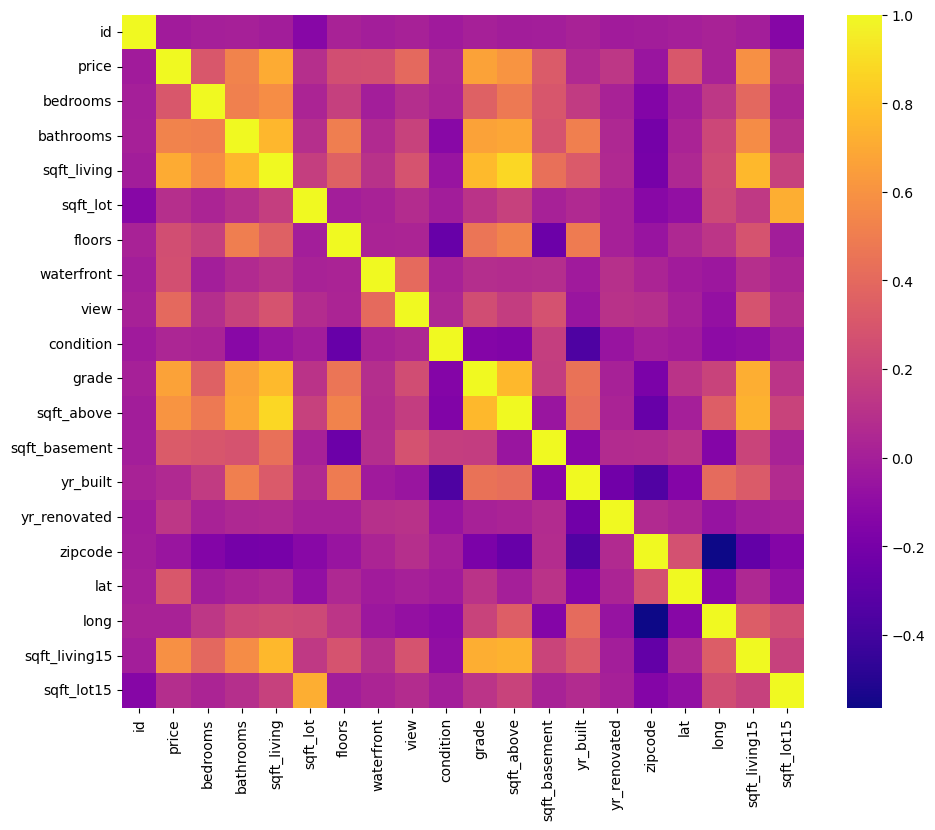

In [32]:
# Confusion Matrix. Check correlations. 

plt.subplots(figsize=(11,9))
# Pearson. 
""" To avoid the FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated, 
add the "numeric_only=True" option to specify to only calculate correlations between numerical columns, ignoring any object/categorical columns.
"""
sns.heatmap(dataset_house.corr(numeric_only=True), cmap='plasma');

<div style="line-height:0.60">
<h2 style="color:#26BBEE  "> <u> Statsmodel  </u></h2>
</div>
To check statistically significant variables      
Linear regression

In [38]:
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7      1180.0              0      1955             0   
1          3      7      2170.0            400      1951          1991   
2          3      6       770.0              0      1933             0   
3          5      7      1050.0            910      1965             0   
4          3      8      1680.0              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [35]:
# Add (as first) an additional column of 1s to represent the intercept term
X_new = tools.add_constant(X)
X_new.head()

const  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0    1.0         3       1.00         1180      5650     1.0           0   
1    1.0         3       2.25         2570      7242     2.0           0   
2    1.0         2       1.00          770     10000     1.0           0   
3    1.0         4       3.00         1960      5000     1.0           0   
4    1.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7      1180.0              0      1955             0   
1     0          3      7      2170.0            400      1951          1991   
2     0          3      6       770.0              0      1933             0   
3     0          5      7      1050.0            910      1965             0   
4     0          3      8      1680.0              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [40]:
""" Investigate data to avoid future "MissingDataErrors. """
# Check count of NaNs per column
X_new.isna().sum() 

const            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [41]:
# Check for Null values 
X_new.isna().any()

const            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [42]:
# Check for Infs
X_new[X_new == np.inf].any() 

const            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [43]:
# Get rows containing NaN
X_new[X_new.isna().any(axis=1)]

const  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
10    1.0         3        2.5         3560      9796     1.0           0   
17    1.0         4        1.0         1600      4300     1.5           0   

    view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
10     0          3      8         NaN           1700      1965             0   
17     0          4      7         NaN              0      1916             0   

    zipcode      lat     long  sqft_living15  sqft_lot15  
10    98007  47.6007 -122.145           2210        8925  
17    98103  47.6648 -122.343           1610        4300

In [44]:
# Get rows containing Inf:
X_new[X_new == np.inf] 

const  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0        NaN       NaN        NaN          NaN       NaN     NaN         NaN   
1        NaN       NaN        NaN          NaN       NaN     NaN         NaN   
2        NaN       NaN        NaN          NaN       NaN     NaN         NaN   
3        NaN       NaN        NaN          NaN       NaN     NaN         NaN   
4        NaN       NaN        NaN          NaN       NaN     NaN         NaN   
...      ...       ...        ...          ...       ...     ...         ...   
21608    NaN       NaN        NaN          NaN       NaN     NaN         NaN   
21609    NaN       NaN        NaN          NaN       NaN     NaN         NaN   
21610    NaN       NaN        NaN          NaN       NaN     NaN         NaN   
21611    NaN       NaN        NaN          NaN       NaN     NaN         NaN   
21612    NaN       NaN        NaN          NaN       NaN     NaN         NaN   

       view  condition  grade  sqft_above  sqft_basement  yr_built  \
0       NaN        NaN    NaN         NaN            NaN       NaN   
1       NaN        NaN    NaN         NaN            NaN       NaN   
2       NaN        NaN    NaN         NaN            NaN       NaN   
3       NaN        NaN    NaN         NaN            NaN       NaN   
4       NaN        NaN    NaN         NaN            NaN       NaN   
...     ...        ...    ...         ...            ...       ...   
21608   NaN        NaN    NaN         NaN            NaN       NaN   
21609   NaN        NaN    NaN         NaN            NaN       NaN   
21610   NaN        NaN    NaN         NaN            NaN       NaN   
21611   NaN        NaN    NaN         NaN            NaN       NaN   
21612   NaN        NaN    NaN         NaN            NaN       NaN   

       yr_renovated  zipcode  lat  long  sqft_living15  sqft_lot15  
0               NaN      NaN  NaN   NaN            NaN         NaN  
1               NaN      NaN  NaN   NaN            NaN         NaN  
2               NaN      NaN  NaN   NaN            NaN         NaN  
3               NaN      NaN  NaN   NaN            NaN         NaN  
4               NaN      NaN  NaN   NaN            NaN         NaN  
...             ...      ...  ...   ...            ...         ...  
21608           NaN      NaN  NaN   NaN            NaN         NaN  
21609           NaN      NaN  NaN   NaN            NaN         NaN  
21610           NaN      NaN  NaN   NaN            NaN         NaN  
21611           NaN      NaN  NaN   NaN            NaN         NaN  
21612           NaN      NaN  NaN   NaN            NaN         NaN  

[21613 rows x 19 columns]

In [45]:
# Impute => Replace NaN with column means
X_new = X_new.fillna(X_new.mean()) 

# Check again rows containing NaN
X_new[X_new.isna().any(axis=1)]

Empty DataFrame
Columns: [const, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In [46]:
""" Linear regression using Ordinary Least Squares (OLS). """
# Train: "standard multiple linear" regression
regressor_OLS = sml.OLS(endog=y, exog=X_new).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2796.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:32:05   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.691e+06   2.93e+06      2.282      0.022    9.45e+05    1.24e+07
bedrooms      -3.577e+04   1892.065    -18.905      0.000   -3.95e+04   -3.21e+04
bathrooms      4.115e+04   3253.842     12.646      0.000    3.48e+04    4.75e+04
sqft_living      86.5848    998.874      0.087      0.931   -1871.282    2044.452
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6687.4895   3596.007      1.860      0.063    -360.951    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.106     24.705      0.000    4.87e+04    5.71e+04
condition      2.638e+04   2351.551     11.220      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.847     44.541      0.000    9.17e+04       1e+05
sqft_above       94.6442    998.876      0.095      0.925   -1863.227    2052.516
sqft_basement    63.5207    998.929      0.064      0.949   -1894.454    2021.495
yr_built      -2620.1792     72.662    -36.060      0.000   -2762.603   -2477.756
yr_renovated     19.8132      3.656      5.420      0.000      12.648      26.979
zipcode        -582.4240     32.987    -17.656      0.000    -647.080    -517.768
lat            6.027e+05   1.07e+04     56.148      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6809      3.448      6.288      0.000      14.923      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.123   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868184.508
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Summary explanation 

+ coef: Estimated coefficients/parameters for each independent variable in the model.
+ std err: Standard error of each coefficient estimate. Measures how precise the estimates are.
+ t: t-statistic calculated as coefficient / standard error. Used to assess significance of each coefficient.
+ P>|t|: The p-value associated with each t-statistic. Indicates significance of that term in predicting the dependent variable.
+ [0.025: Lower bound of the 95% confidence interval for each coefficient estimate.
+ 0.975]: Upper bound of the 95% confidence interval for each coefficient estimate.

### Regression summary output:

Dep. Variable: The dependent/target variable being modeled (price)

R-squared: The percentage of variance explained by the model. Higher is better, >0.7 is good.

Adj. R-squared: Adjusted for number of predictors, avoids overfitting.

F-statistic: Tests if the model as a whole is significant. Compares residual & explained variance.

Prob(F-statistic): Extremely low p-value (<0.05) means model is statistically significant.

No. Observations: Number of data points

Df Residuals: Degrees of freedom for residuals. #Obs - #predictors - 1

Df Model: Degrees of freedom for model. #predictors

Log-Likelihood: Model log-likelihood, used for model comparison. Higher is better.

AIC: Akaike Information Criterion, evaluates relative quality of models. Lower is better.

BIC: Bayesian Information Criterion, evaluates relative quality of models. Lower is better.

<div style="line-height:0.45">
<h1 style="color:#26BBEE  "> <u> Simple Linear Regressor 1 </u></h1>
</div>
Using "sqft_living" as independent variable x.

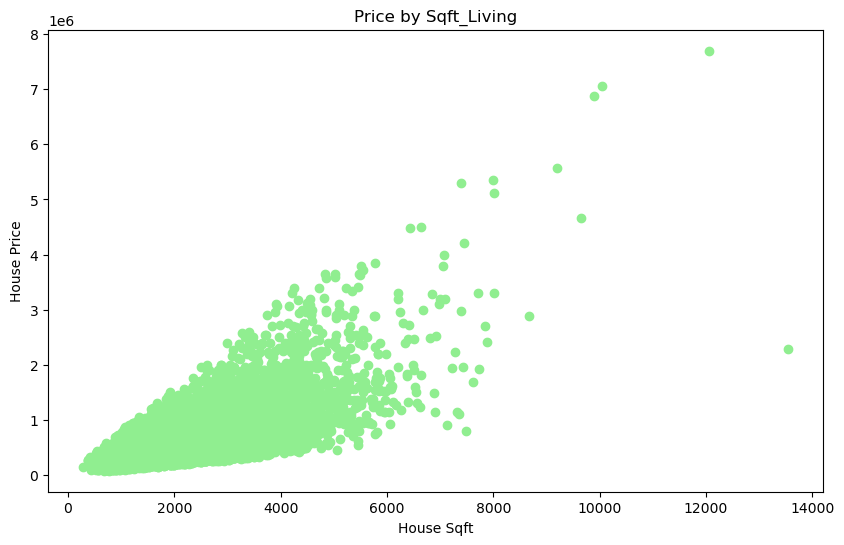

In [48]:
x = X[['sqft_living']]

plt.figure(figsize=(10,6))
plt.xlabel('House Sqft')
plt.ylabel('House Price')
plt.title('Price by Sqft_Living')
plt.scatter(x,y, marker='o', color='lightgreen')
plt.show()

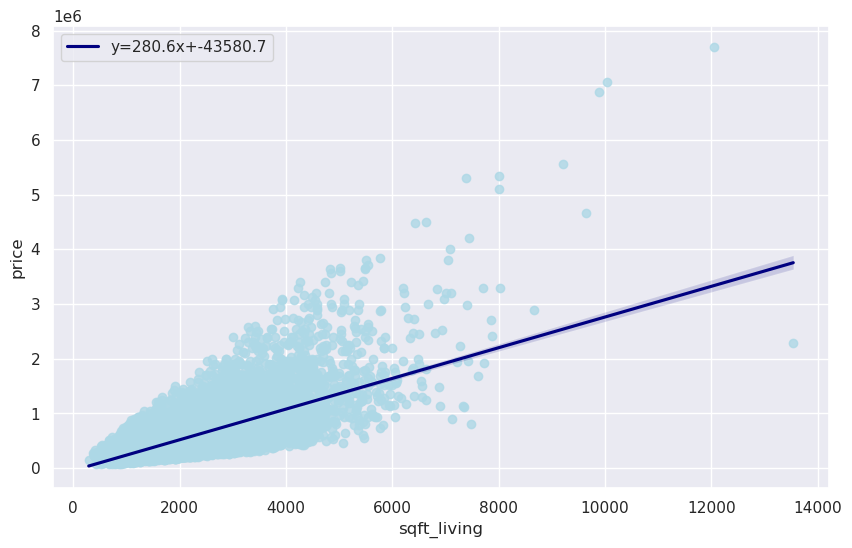

In [54]:
# Set the Seaborn default aesthetic parameters to use color codes for plots
sns.set(color_codes=True)

# Calculate linear regression statistics between sqft_living and price
slope, intercept, r_value, p_value, std_err = sc.stats.linregress(dataset_house['sqft_living'],dataset_house['price'])

f = plt.figure(figsize=(10,6))
# Create a tmp df selecting only the column in exam now: sqft_living (x) and price (y)
data = dataset_house[['price','sqft_living']]

# Create scatterplot with regression line with x-axis is sqft_living, y-axis is price
# Draw the line from slope and intercept
ax = sns.regplot(x='sqft_living', y='price', data=data, scatter_kws={"color": "lightblue"}, 
                line_kws={'color': 'navy', 'label':"y={0:.1f}x + {1:.1f}".format(slope, intercept)})
ax.legend()
plt.show()

In [56]:
slope, intercept, std_err

(280.6235678974483, -43580.74309447408, 1.9363985519989133)

<h2 style="color:#26BBEE  "> <u> Gradient Descent Implementation </u></h2>

In [57]:
def compute_costs(x, y, theta):
    """ Compute the cost function (called by gradientDecent).
    
    Params:
        - Matrix of features with examples as rows and features as columns 
        - Target values
        - Parameter vector
    
    Details:
        - Get the number of training examples
        - Get the predicted values (hypothesis) 
        - Calculate the cost j => the squared error term summed over all examples and divided by 2*m
    
    Returns:
        Value of the cost function [float].
    """
    m = len(y)
    h_x = x.dot(theta)
    j = np.sum(np.square(h_x - y))*(1/(2*m))  #gradient formula
    return j

def calc_gradient_descent(x, y, theta, alpha, iteration):
    """" Calculate the gradient descent.

    Params:
        - Matrix of features with examples as rows and features as columns 
        - Target values
        - Initial parameter vector
        - Learning rate
        - Number of iterations to run gradient descent
    
    Details:
        - Initialize the cost history list
        - Get the number of training examples
        - For each iteration:
            - Append the cost to the history list by calling compute_costs
            - Calculate the predicted values (hypothesis)
            - Update the theta parameters by subtracting the learning rate times the partial derivative of the cost function
    
    Returns:
        Optimized parameter vector after gradient descent [ndarray].
        History of cost function over iterations [list].
    """
    j_hist = []
    m = len(y)
    for i in range(iteration):
        j_hist.append(compute_costs(x, y, theta))
        h_x = x.dot(theta)
        theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))
    return theta, j_hist

In [58]:
xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1)

# Add a column of ones to the left of the feature matrix x for the bias term:
    # Creates an array of ones the same length as x reshaped to be a column vector with shape (samples, 1)
    # Concatenate the column of ones and the feature matrix x along axis 1 (columns)
xg = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

In [60]:
xg, yg

(array([[1.00e+00, 1.18e+03],
        [1.00e+00, 2.57e+03],
        [1.00e+00, 7.70e+02],
        ...,
        [1.00e+00, 1.02e+03],
        [1.00e+00, 1.60e+03],
        [1.00e+00, 1.02e+03]]),
 array([[221900.],
        [538000.],
        [180000.],
        ...,
        [402101.],
        [400000.],
        [325000.]]))

In [70]:
theta = np.zeros((2,1))
iteration = 20000
alpha = 0.01

theta, cost = calc_gradient_descent(xg, yg, theta, alpha, iteration)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))

/tmp/ipykernel_972643/2823265455.py:19: RuntimeWarning: overflow encountered in square
  j = np.sum(np.square(h_x - y))*(1/(2*m))  #gradient formula
/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_972643/2823265455.py:49: RuntimeWarning: invalid value encountered in subtract
  theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))


Theta found by Gradient Descent: slope = [nan] and intercept [nan]


N.B possible warnings here: 

+ /tmp/ipykernel_972643/2823265455.py:19: RuntimeWarning: overflow encountered in square
+ ./numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
+ /tmp/ipykernel_972643/2823265455.py:49: RuntimeWarning: invalid value encountered in subtract

In [62]:
theta.shape


(2, 1)

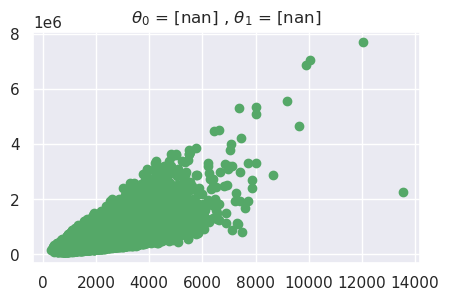

In [65]:
plt.figure(figsize=(5,3))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x,y, marker='o', color='g')
plt.plot(x,np.dot(x.values, theta.T))
plt.show()

Text(0, 0.5, 'Cost')

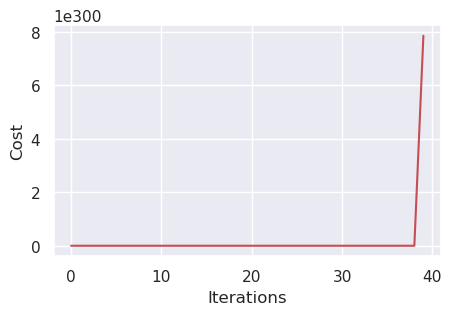

In [69]:
plt.figure(figsize=(5,3))
plt.plot(cost, c='r')
plt.xlabel('Iterations')
plt.ylabel('Cost')

<div style="line-height:0.5">
<h2 style="color:#26BBEE  "> <u> Manual Method: </u></h2>
</div>
Compute Slope and Intercept using a Formula (Gradient = 0)  

<div style="line-height:0.48">
<h2 style="color:#26BBEE  "> Recap: </h2>
</div>
Slope: The steepness or gradient of the linear regression line.     <br>
=> How much the dependent variable y changes when the independent variable x changes by 1 unit.     <br>
A positive slope means y increases as x increases. A negative slope means y decreases as x increases.     <br>

$${
sl = \frac{\sum{(x_i - \overline{x})(y_i - \overline{Y})}}{\sum(x_i - \overline{x})^2}
}$$

Intercept:
The point where the linear regression line crosses the y-axis. The value of y when x is equal to 0.    
=> Which is the average value of y when x is zero or has minimal effect.      

| Intercept |
|-|
| $$ in = \overline{y} - a\overline{x} $$ |



In [74]:
def get_slope_and_intercept(X, Y):
    mean_x = X.mean()
    mean_y = Y.mean()

    ## Shift X/Y values from the mean 
    delta_x = X - mean_x
    delta_y = Y - mean_y
    ## Slope:
        # Numerator is the dot product of centered X and Y
        # Denominator is the sum of squared centered X
    slope = (delta_x * delta_y).sum()/(delta_x**2).sum()
    ## Intercept => mean Y value minus the slope times mean X value
    intercept = mean_y - slope*mean_x
    
    return (slope, intercept)

In [75]:
xf = x.values.reshape(-1,1)
yf = y.values.reshape(-1,1)

xf, yf

(array([[1180],
        [2570],
        [ 770],
        ...,
        [1020],
        [1600],
        [1020]]),
 array([[221900.],
        [538000.],
        [180000.],
        ...,
        [402101.],
        [400000.],
        [325000.]]))

In [76]:
slope, intercept = get_slope_and_intercept(xf, yf)
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 280.6235678974483 and Intercept = -43580.74309447408
y = x(280.6235678974483) + -43580.74309447408


In [78]:
xs = x.iloc[:,0]
ys = y.iloc[:,0]

slope, intercept, r_value, p_value, std_err = sc.stats.linregress(xs, ys)

xs, ys

(0        1180
 1        2570
 2         770
 3        1960
 4        1680
          ... 
 21608    1530
 21609    2310
 21610    1020
 21611    1600
 21612    1020
 Name: sqft_living, Length: 21613, dtype: int64,
 0        221900.0
 1        538000.0
 2        180000.0
 3        604000.0
 4        510000.0
            ...   
 21608    360000.0
 21609    400000.0
 21610    402101.0
 21611    400000.0
 21612    325000.0
 Name: price, Length: 21613, dtype: float64)

In [80]:
""" Compare with scipy results """
print("slope: {}".format(slope))
print("intercept: {}".format(intercept))
print("r_value: {}".format(r_value))
print("p_value: {}".format(p_value))
print("std_err: {}".format(std_err))

slope: 280.6235678974483
intercept: -43580.74309447408
r_value: 0.7020350546118003
p_value: 0.0
std_err: 1.9363985519989133


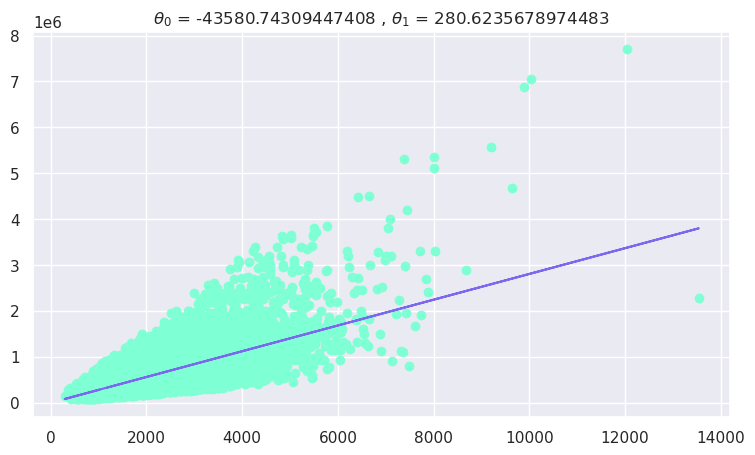

In [85]:
plt.figure(figsize=(9,5))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(intercept, slope))
plt.scatter(xs,y, marker='o', color='aquamarine')
plt.plot(xs, np.dot(x, slope), 'mediumslateblue');

In [90]:
#### Comparison with sklearn results
xsl = x.values.reshape(-1,1)
ysl = y.values.reshape(-1,1)
# Add bias of ones
xsl2 = np.concatenate((np.ones(len(xsl)).reshape(-1,1), xsl), axis=1)

xsl, xsl2

(array([[1180],
        [2570],
        [ 770],
        ...,
        [1020],
        [1600],
        [1020]]),
 array([[1.00e+00, 1.18e+03],
        [1.00e+00, 2.57e+03],
        [1.00e+00, 7.70e+02],
        ...,
        [1.00e+00, 1.02e+03],
        [1.00e+00, 1.60e+03],
        [1.00e+00, 1.02e+03]]))

In [95]:
sklearn_lr = LinearRegression()
# Train
sklearn_lr.fit(xsl2[:,1].reshape(-1,1), ysl.reshape(-1,1))
# Predict
y_hat = sklearn_lr.predict(xsl2[:,1].reshape(-1,1))

print('theta[0] = ', sklearn_lr.intercept_)
print('theta[1] = ', sklearn_lr.coef_)

theta[0] =  [-43580.74309447]
theta[1] =  [[280.6235679]]


In [105]:
""" Optimized learned parameters (vector) of the linear regression model. 
    - Concatenate the the intercept term learned by the model with the coefficients learned for each feature (array)
    - Stack them vertically (along axis 0) to produce a single vector containing all the parameters.
"""
thetas = np.concatenate((sklearn_lr.intercept_, sklearn_lr.coef_[0]), axis=0)
thetas

array([-43580.74309447,    280.6235679 ])

In [106]:
thetas.shape, xsl2.shape

((2,), (21613, 2))

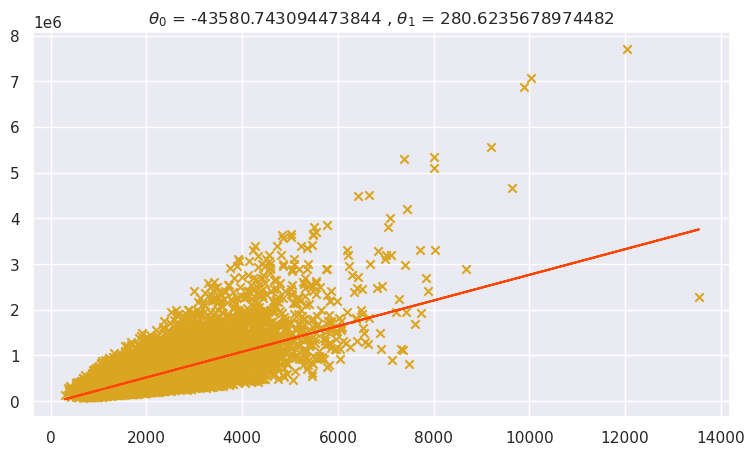

In [111]:
plt.figure(figsize=(9,5))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsl2[:,1],y, marker='x', color='goldenrod')
plt.plot(xsl2[:,1], np.dot(xsl2, thetas), 'orangered');

#### Compare with Statsmodel results:

In [112]:
xsm = x.values.reshape(-1,1)
ysm = y.values.reshape(-1,1)
xsm = np.concatenate((np.ones(len(x)).reshape(-1,1), xsm), axis=1)

results = sml.OLS(ysm, xsm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:54:06   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
x1           280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

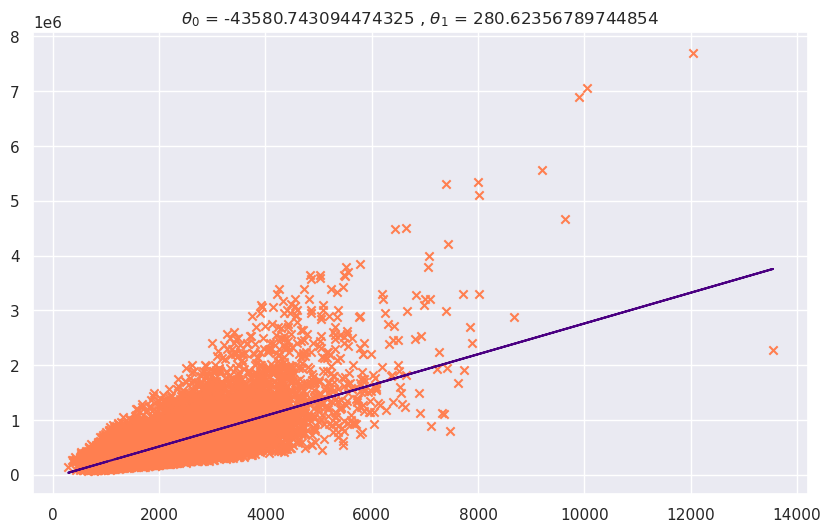

In [118]:
thetas = results.params

plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsm[:,1],ysm, marker='x', color='coral')
plt.plot(xsm[:,1], np.dot(xsm, thetas), 'indigo');

<div style="line-height:0.5">
<h2 style="color:#26BBEE  "> <u> Improving results with Statsmodel: </u></h2>
</div>
Compute Slope and Intercept using a Formula (Gradient = 0). <br>
With only one feature (after adding the constant) there is no multi-collinearity, so regularization has no impact. <br>

In [128]:
# Ridge regression
ridge = sml.OLS(ysm, sml.add_constant(xsm)).fit_regularized(L1_wt=0.1)
type(ridge)

statsmodels.base.elastic_net.RegularizedResultsWrapper

In [122]:
# Predict on train data
y_pred = ridge.predict(xsm)

# Calculate MSE 
mse = np.mean((ysm - y_pred)**2)
# Calculate total sum of squares
sstot = np.sum((ysm - np.mean(ysm))**2) 
# R-squared 
r_squared = 1 - mse/sstot

print('Ridge R-squared:', r_squared)

Ridge R-squared: 0.9999309341750173


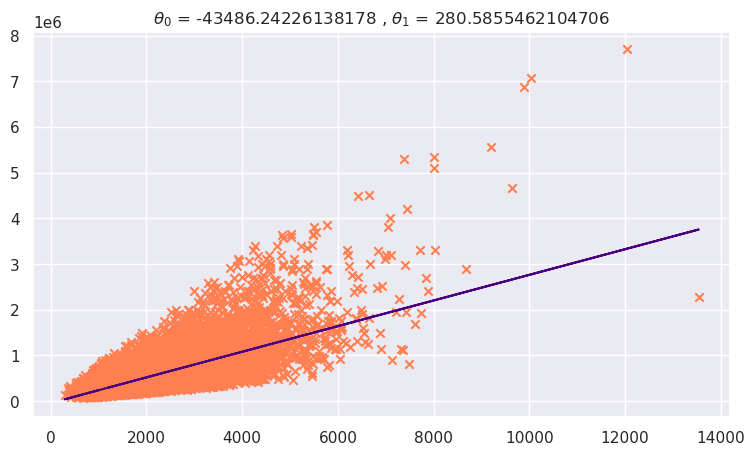

In [125]:
thetas_ridge = ridge.params

plt.figure(figsize=(9,5))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas_ridge[0], thetas_ridge[1]))
plt.scatter(xsm[:,1],ysm, marker='x', color='coral')
plt.plot(xsm[:,1], np.dot(xsm, thetas_ridge), 'indigo');

In [133]:
thetas_ridge

array([-43486.24226138,    280.58554621])

In [130]:
""" Lasso regression  """
lasso = sml.OLS(ysm, sml.add_constant(xsm)).fit_regularized(L1_wt=1.0)
type(lasso)

statsmodels.base.elastic_net.RegularizedResultsWrapper

In [131]:
# Predict on train data
y_pred = lasso.predict(xsm)

# Calculate MSE 
mse = np.mean((ysm - y_pred)**2)
# Calculate total sum of squares
sstot = np.sum((ysm - np.mean(ysm))**2) 

# R-squared 
r_squared = 1 - mse/sstot

print('Ridge R-squared:', r_squared)

Ridge R-squared: 0.9999309341750173


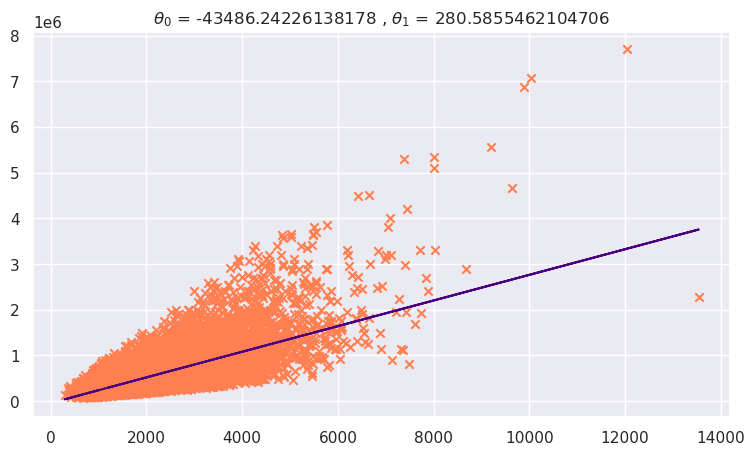

In [132]:
thetas_lasso = lasso.params

plt.figure(figsize=(9,5))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas_lasso[0], thetas_lasso[1]))
plt.scatter(xsm[:,1], ysm, marker='x', color='coral')
plt.plot(xsm[:,1], np.dot(xsm, thetas_lasso), 'indigo');

<h2 style="color:#26BBEE  "> <u> Multiple Linear Regression </u></h2>

In [136]:
dataset_house = pd.read_csv('../datas/kc_house_data.csv')
Y = dataset_house[['price']]
X = dataset_house.drop(['price', 'id', 'date'],  axis=1)

x = X.values
y = y.values

In [137]:
def normalize_features(x_data):
    """ Normalize features 

    Details: 
    - Initialize empty arrays (with zeros) mu and sigma to store mean and standard deviation of each feature column. 
        Shape is 1 row x number of columns.
    - Make a copy of input with float type 
    - For each column index from 0 to length of mu/sigma arrays:
        - Calculate mean of each feature column 
        - Calculate standard deviation of each feature column 
        - Normalize each feature column by subtracting mean and dividing by standard deviation

    Returns:
        Normalized data + mean + std [ndarrays]
    """
    mu = np.zeros((1,x_data.shape[1]))
    sigma = np.zeros((1,x_data.shape[1]))
    x_norm = x_data.astype(float)
    
    for i in range(0,len(mu)+1):
        mu[:,i] = x_data[:,i].mean()
        sigma[:,i] = x_data[:,i].std()
        x_norm[:,i] = (x_data[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

In [138]:
x_norm, mu, sigma = normalize_features(x)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [139]:
def compute_cost_gd(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

In [142]:
theta_init = np.zeros((19, 1))
cos = compute_cost_gd(x_norm, Y, theta_init)
cos

price    2.132201e+11
dtype: float64

In [143]:
def gradient_descent_multi(X, Y, theta, alpha, num_iters):
    m = len(Y)
    p = np.copy(X)
    t = np.copy(theta)
    j = []
    for i in range(0,num_iters+1):
        cost = compute_cost_gd(p, Y, t)
        j.append(cost)
        h_x = np.dot(p, t)
        err = h_x - Y
        for f in range(theta.size):
            t[f] = t[f] - alpha/m *(np.sum((np.dot(p[:,f].T, err))))
    return j, t

In [144]:
alpha = 0.01
num_iters = 5000
theta_init = np.zeros((19, 1))
cost, theta_final = gradient_descent_multi(x_norm, Y, theta_init, alpha, num_iters)

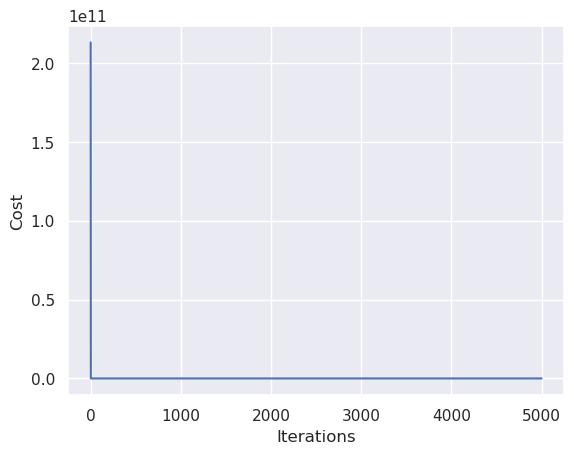

In [145]:
plt.figure()
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [146]:
theta_init, theta_final

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]))

#### Multi-variable Regression with Scikit-Learn

In [149]:
mlr = LinearRegression()
sc_x = StandardScaler()
X_new = sc_x.fit_transform(x)

In [152]:
# Get NaN values in numpy
if np.isnan(X_new).any():
  print("NaNs detected!")

NaNs detected!


In [154]:
imputer = SimpleImputer().fit(X_new)
X_newnew = imputer.transform(X_new)

In [155]:
# Train 
mlr.fit(X_newnew, Y)
# Predict 
y_hat = mlr.predict(X_newnew)

In [156]:
y_hat

array([[208874.98592087],
       [734052.70203448],
       [380502.88267387],
       ...,
       [143430.97498172],
       [385288.73042831],
       [146083.81566586]])

In [158]:
# Coefficient of determination R^2
mlr.score(X_newnew, Y)

0.6997473138406325

In [159]:
mlr.intercept_

array([540088.14176653])

In [160]:
mlr.coef_


array([[-33266.61864267,  31688.83992889,  79521.15669473,
          5326.36267299,   3611.08651935,  50434.8905744 ,
         40514.74853474,  17169.07480938, 112711.98270622,
         78375.68485919,  28112.00942483, -76961.81875008,
          7958.36008855, -31161.89061989,  83516.69253007,
        -30238.82576962,  14859.58843152, -10447.60725901]])

In [161]:
""" Calculate weights. """
x_neq = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)
a = np.linalg.inv(np.dot(x_neq.T, x_neq))
b = np.dot(x_neq.T, y)

theta_neq = np.dot(a,b)
theta_neq

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

<h2 style="color:#26BBEE  "> <u> Scipy implementation </u></h2>

In [165]:
%%script echo skipping to avoid MemoryError: Unable to allocate 1.23 TiB for an array with shape (410647, 410647) and data type float64

slope, intercept, r_value, p_value, std_err = sc.stats.linregress(X.values.reshape(-1,1), Y.values)

print('theta[0] = ', intercept)
print('theta[1] = ', slope)

skipping to avoid MemoryError: Unable to allocate 1.23 TiB for an array with shape (410647, 410647) and data type float64


In [168]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7      1180.0              0      1955             0   
1              3      7      2170.0            400      1951          1991   
2              3      6       770.0              0      1933             0   
3              5      7      1050.0            910      1965             0   
4              3      8      1680.0              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21608          3      8      1530.0              0      2009             0   
21609          3      8      2310.0              0      2014             0   
21610          3      7      1020.0              0      2009             0   
21611          3      8      1600.0              0      2004             0   
21612          3      7      1020.0              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
0        98178  47.5112 -122.257           1340        5650  
1        98125  47.7210 -122.319           1690        7639  
2        98028  47.7379 -122.233           2720        8062  
3        98136  47.5208 -122.393           1360        5000  
4        98074  47.6168 -122.045           1800        7503  
...        ...      ...      ...            ...         ...  
21608    98103  47.6993 -122.346           1530        1509  
21609    98146  47.5107 -122.362           1830        7200  
21610    98144  47.5944 -122.299           1020        2007  
21611    98027  47.5345 -122.069           1410        1287  
21612    98144  47.5941 -122.299           1020        1357  

[21613 rows x 18 columns]

#### Statsmodel implementation (NO feature scaling)


In [171]:
""" Calculate weights. """
x_neq2 = np.concatenate((np.ones(len(X_newnew)).reshape(-1,1), x), axis=1)
a = np.linalg.inv(np.dot(x_neq2.T, x_neq2))
b = np.dot(x_neq2.T, y)

theta_neq2 = np.dot(a,b)
theta_neq2

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [177]:
type(Y)

pandas.core.frame.DataFrame

In [183]:
type(x_neq2)

numpy.ndarray

In [180]:
""" Check Nans in case of Pandas Dataframes (not ndarrays). """
#for col in Y:
#   if Y[col].isnull().any():
#      print(f"NaNs in column {col}")

## or better...      
if Y.isnull().any().any():
    print("NaNs detected!")

In [184]:
if np.isnan(x_neq2).any(): 
    print("NaNs detected!")

NaNs detected!


In [186]:
imputer3 = SimpleImputer().fit(x_neq2)
x_neq3 = imputer3.transform(x_neq2)    

In [187]:
imputer4 = SimpleImputer().fit(Y)
Y_ok = imputer4.transform(Y)    

In [188]:
results = sml.OLS(Y_ok, x_neq3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2796.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:04:14   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.691e+06   2.93e+06      2.282      0.022    9.45e+05    1.24e+07
x1         -3.577e+04   1892.065    -18.905      0.000   -3.95e+04   -3.21e+04
x2          4.115e+04   3253.842     12.646      0.000    3.48e+04    4.75e+04
x3            86.5848    998.874      0.087      0.931   -1871.282    2044.452
x4             0.1286      0.048      2.683      0.007       0.035       0.223
x5          6687.4895   3596.007      1.860      0.063    -360.951    1.37e+04
x6           5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
x7          5.287e+04   2140.106     24.705      0.000    4.87e+04    5.71e+04
x8          2.638e+04   2351.551     11.220      0.000    2.18e+04     3.1e+04
x9          9.589e+04   2152.847     44.541      0.000    9.17e+04       1e+05
x10           94.6442    998.876      0.095      0.925   -1863.227    2052.516
x11           63.5207    998.929      0.064      0.949   -1894.454    2021.495
x12        -2620.1792     72.662    -36.060      0.000   -2762.603   -2477.756
x13           19.8132      3.656      5.420      0.000      12.648      26.979
x14         -582.4240     32.987    -17.656      0.000    -647.080    -517.768
x15         6.027e+05   1.07e+04     56.148      0.000    5.82e+05    6.24e+05
x16        -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
x17           21.6809      3.448      6.288      0.000      14.923      28.439
x18           -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.123   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868184.508
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
tt = results.params
tt

array([ 6.69124722e+06, -3.57690071e+04,  4.11465710e+04,  8.65847728e+01,
        1.28595367e-01,  6.68748949e+03,  5.82959905e+05,  5.28706211e+04,
        2.63844110e+04,  9.58898725e+04,  9.46441648e+01,  6.35206622e+01,
       -2.62017917e+03,  1.98131828e+01, -5.82424003e+02,  6.02745297e+05,
       -2.14726133e+05,  2.16809465e+01, -3.82646507e-01])

In [190]:
# Predict house with 2 bedroom for a square-feet of 1200 
tt[0] + (tt[1] * 1200) + (tt[2] * 2)

-36149268.19156999

<h3 style="color:#26BBEE  "> Statsmodel implementation with Feature Normalization</h3>

In [194]:
d = sml.add_constant(X_newnew)
results = sml.OLS(Y, d).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2796.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:04:36   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.401e+05   1368.937    394.531      0.000    5.37e+05    5.43e+05
x1         -3.327e+04   1759.697    -18.905      0.000   -3.67e+04   -2.98e+04
x2          3.169e+04   2505.931     12.646      0.000    2.68e+04    3.66e+04
x3          7.952e+04   9.17e+05      0.087      0.931   -1.72e+06    1.88e+06
x4          5326.3627   1984.969      2.683      0.007    1435.677    9217.048
x5          3611.0865   1941.759      1.860      0.063    -194.905    7417.078
x6          5.043e+04   1501.947     33.580      0.000    4.75e+04    5.34e+04
x7          4.051e+04   1639.963     24.705      0.000    3.73e+04    4.37e+04
x8          1.717e+04   1530.220     11.220      0.000    1.42e+04    2.02e+04
x9          1.127e+05   2530.524     44.541      0.000    1.08e+05    1.18e+05
x10         7.838e+04   8.27e+05      0.095      0.925   -1.54e+06     1.7e+06
x11         2.811e+04   4.42e+05      0.064      0.949   -8.38e+05    8.95e+05
x12        -7.696e+04   2134.290    -36.060      0.000   -8.11e+04   -7.28e+04
x13         7958.3601   1468.377      5.420      0.000    5080.232    1.08e+04
x14        -3.116e+04   1764.908    -17.656      0.000   -3.46e+04   -2.77e+04
x15         8.352e+04   1487.449     56.148      0.000    8.06e+04    8.64e+04
x16        -3.024e+04   1849.633    -16.349      0.000   -3.39e+04   -2.66e+04
x17         1.486e+04   2363.040      6.288      0.000    1.02e+04    1.95e+04
x18        -1.045e+04   2000.555     -5.222      0.000   -1.44e+04   -6526.373
==============================================================================
Omnibus:                    18384.123   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868184.508
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
# Extract the coefficient (parameter) estimates 
tt2 = results.params
tt2

const    540088.141767
x1       -33266.618643
x2        31688.839929
x3        79521.156693
x4         5326.362673
x5         3611.086519
x6        50434.890574
x7        40514.748535
x8        17169.074809
x9       112711.982706
x10       78375.684860
x11       28112.009426
x12      -76961.818750
x13        7958.360089
x14      -31161.890620
x15       83516.692530
x16      -30238.825770
x17       14859.588432
x18      -10447.607259
dtype: float64

In [202]:
""" Prediction. """
# Re-initialize StandardScaler => Fit to normalize a sample of 2 features -> square feet and number of bedrooms.
sc_x.fit(np.array([1200, 2]).reshape(-1, 2))  
# Transform new data points consisting of 1200 sqft and 2 bedrooms using the StandardScaler.
house = sc_x.transform(np.array([1200, 2]).reshape(1,-1))

# Predict the target value
pred_price = tt2[0] + (tt2[1] * house[0][0]) + (tt2[2] * house[0][1])
pred_price 

540088.1417665284

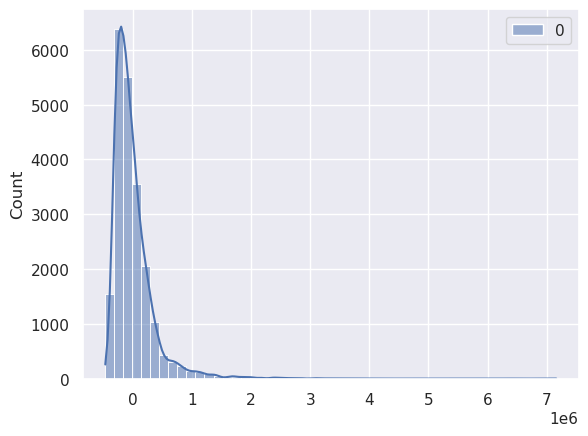

In [211]:
""" Check residuals """
# "distplot" is a deprecated function! 
#sns.distplot((y - pred_price),bins=50);
sns.histplot((y - pred_price), bins=50, kde=True); # kde=True => show kernel density estimate line, like old distplot

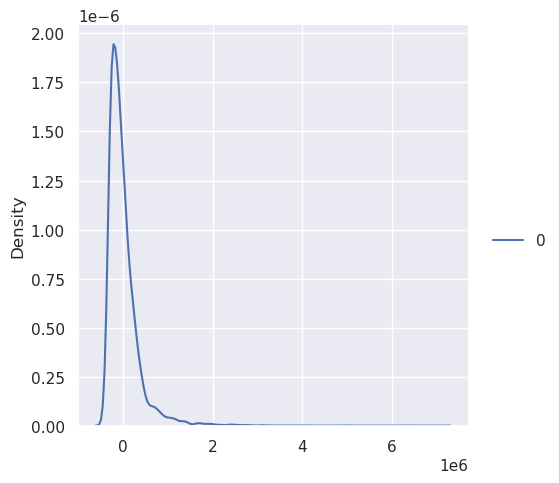

In [213]:
sns.displot((y - pred_price), kind="kde");

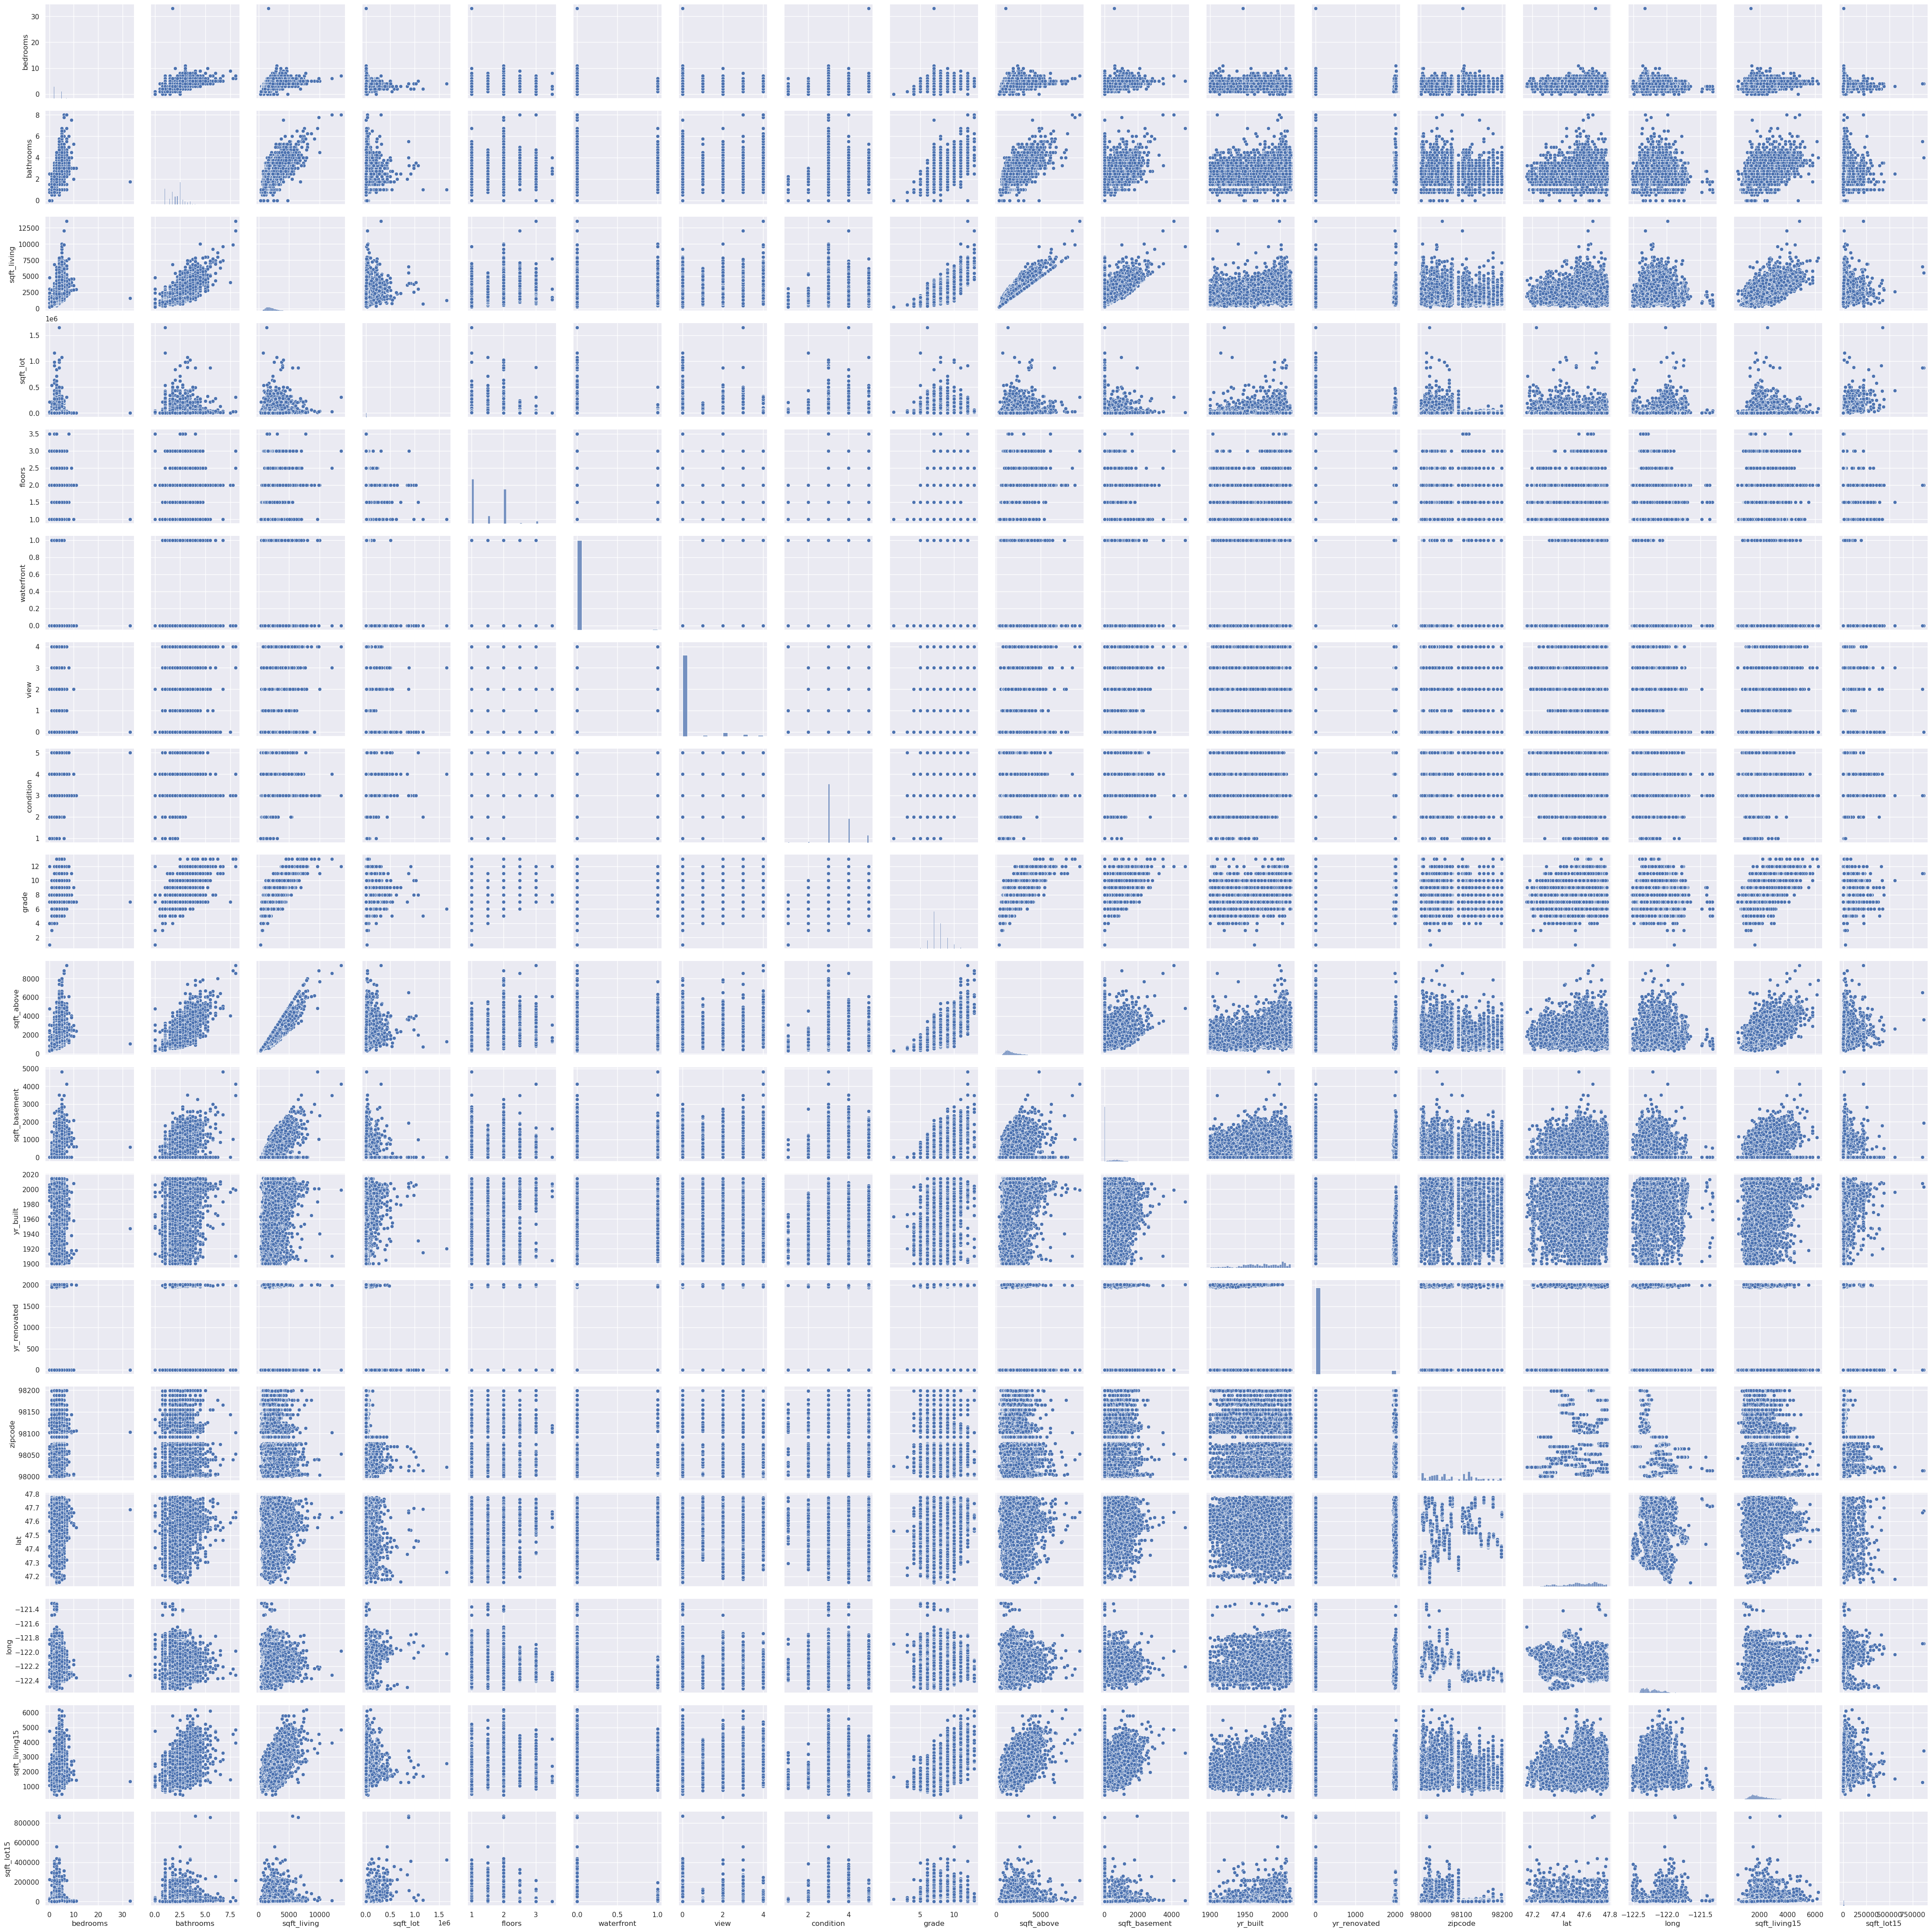

In [218]:
sns.set_style("darkgrid")
sns.pairplot(X)